In [1]:
#https://github.com/danielgatis/rembg

!pip install rembg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 5.5 MB/s eta 0:00:00


In [2]:
from rembg import remove
from PIL import Image
import requests
from io import BytesIO
import os
import time
import tracemalloc

Execution time: 3.352323532104492 seconds
Current memory usage: 524646.0 MB; Peak memory usage: 3768074.4000000004 MB
Original Image:


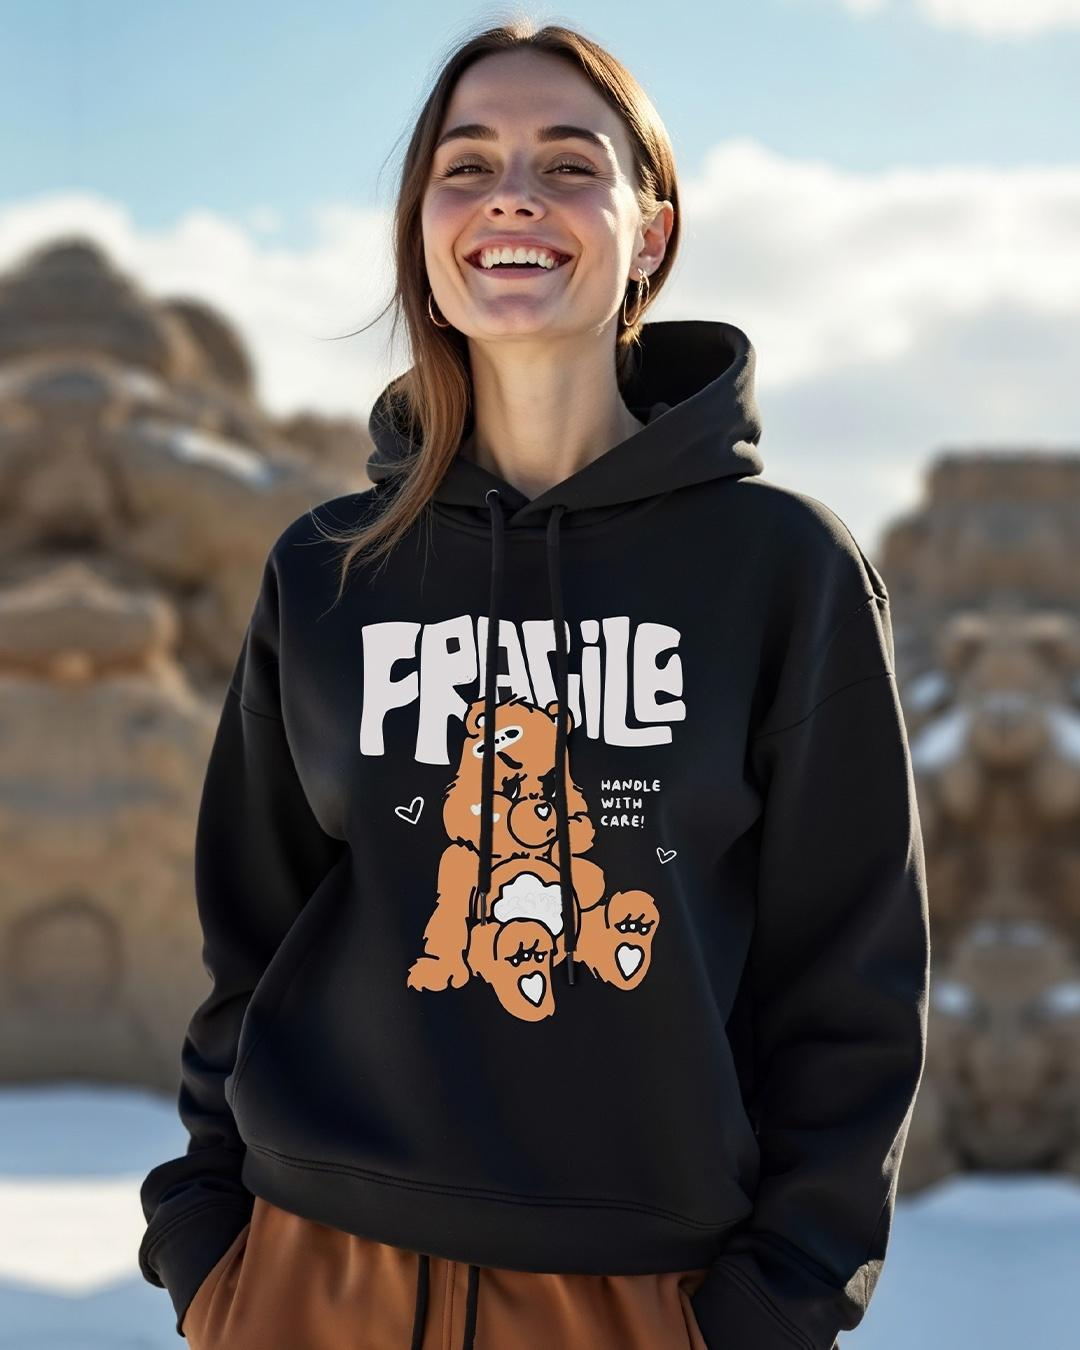

Masked Image with Black Background:


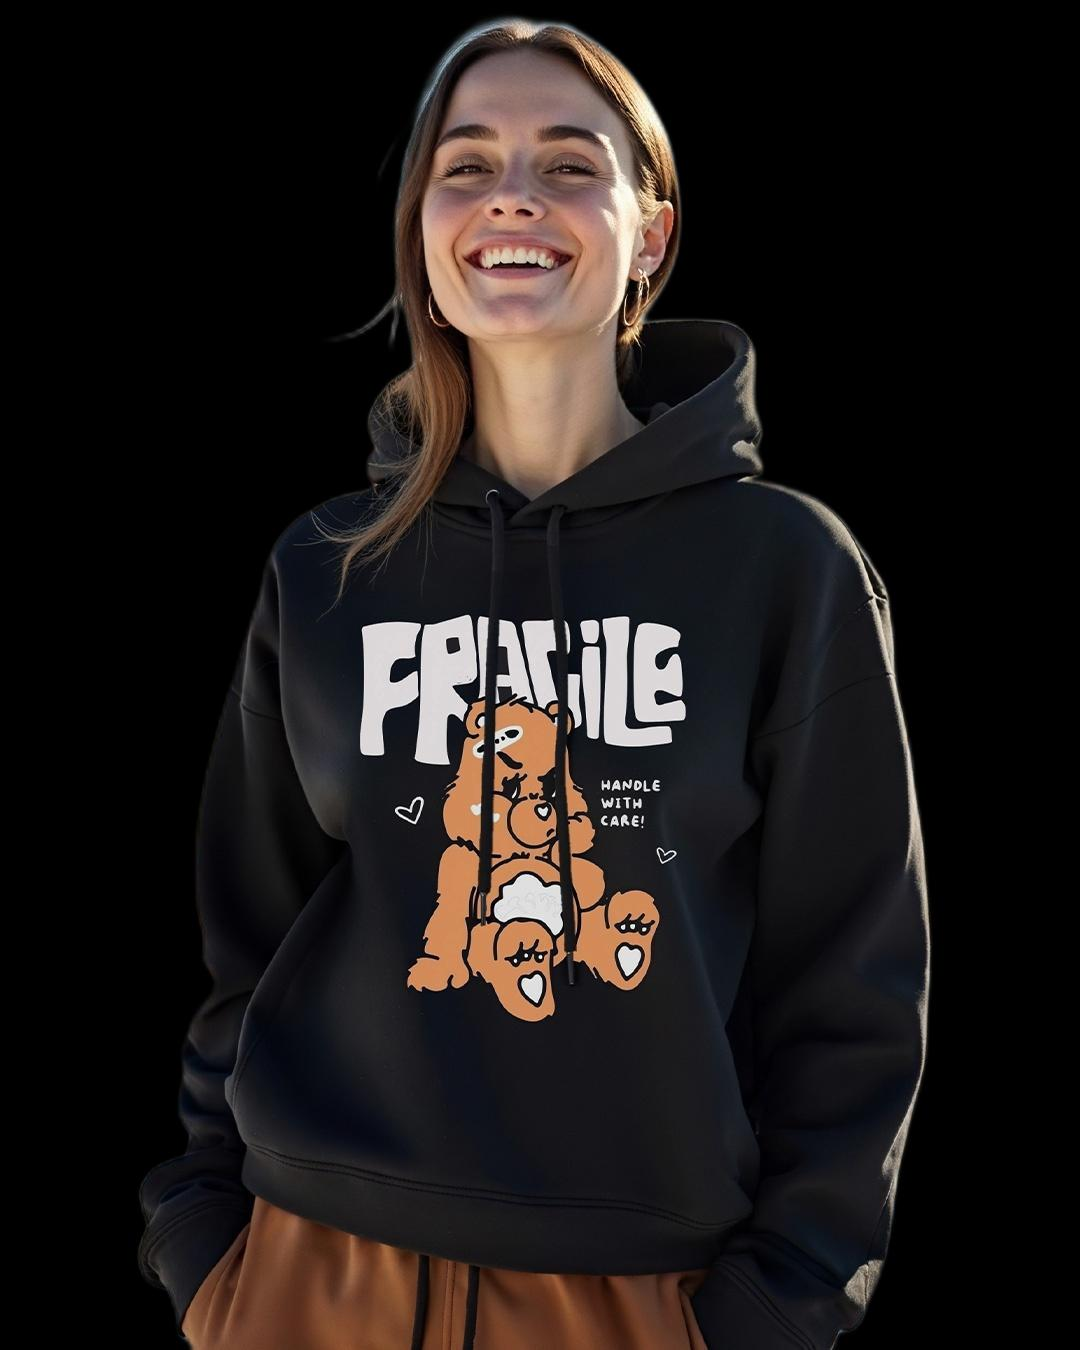

In [4]:
import os
import requests
from PIL import Image, ImageOps
from io import BytesIO
from IPython.display import display
import tracemalloc
import time
from rembg import remove  # Import the remove function from rembg

def bgRemover():
    # Create directories if they don't exist
    os.makedirs('original', exist_ok=True)
    os.makedirs('masked', exist_ok=True)

    # Image URL and file name
    img_url = 'https://images.bewakoof.com/t1080/women-s-black-fragile-graphic-printed-oversized-hoodies-541486-1726120790-1.jpg'
    img_name = img_url.split('/')[-1]

    # Fetch and save the original image
    try:
        response = requests.get(img_url)
        response.raise_for_status()
        img = Image.open(BytesIO(response.content))
        img.save(f'original/{img_name}', format='JPEG')
    except requests.exceptions.RequestException as e:
        print("Error downloading image:", e)
        return

    # Background removal process
    tracemalloc.start()
    start_time = time.time()

    with open(f'original/{img_name}', 'rb') as input_file:
        input_data = input_file.read()

        # Perform background removal using rembg
        result = remove(input_data)

    end_time = time.time()
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()

    # Load the background-removed image
    masked_img = Image.open(BytesIO(result)).convert("RGBA")

    # Create a black background image of the same size
    black_bg = Image.new("RGBA", masked_img.size, (0, 0, 0, 255))

    # Composite the images (black background with masked image on top)
    final_image = Image.alpha_composite(black_bg, masked_img).convert("RGB")

    # Save the result with black background
    final_image.save(f'masked/{img_name}', format='JPEG')

    print(f"Execution time: {end_time - start_time} seconds")
    print(f"Current memory usage: {current / 10*6} MB; Peak memory usage: {peak / 10*6} MB")

    # Display original and masked images
    display_original_masked_images(img_name)

def display_original_masked_images(img_name):
    try:
        # Display original image
        original_image = Image.open(f'original/{img_name}')
        print("Original Image:")
        display(original_image)

        # Display masked image with black background
        masked_image = Image.open(f'masked/{img_name}')
        print("Masked Image with Black Background:")
        display(masked_image)

    except FileNotFoundError:
        print("One or both of the images are not available for display.")

# Run the background remover function
bgRemover()